In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\84941\OneDrive - National Economics University\Documents\Risk Mag\german_credit_data.csv")
df = pd.DataFrame(data)


In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df['Risk'] = df['Risk'].replace(['good', 'bad'], [0,1])

In [6]:
df['Risk'].value_counts()

0    700
1    300
Name: Risk, dtype: int64

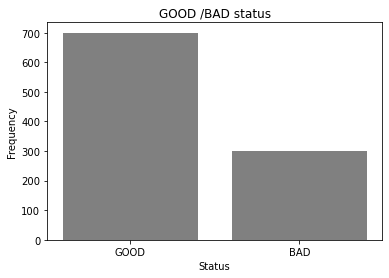

In [7]:
a = (df['Risk'] == 0).sum()
b = (df['Risk'] == 1).sum()

var = ['GOOD', 'BAD']
val = [a, b]

plt.bar(var, val, color =  'grey')
plt.title('GOOD /BAD status')
plt.ylabel('Frequency')
plt.xlabel('Status')
plt.show()


In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [10]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [44]:
mis_val = ['Saving accounts', 'Checking account']
for val in mis_val:
    df[val] = df[val].fillna(df[val].mode().values[0])
    


In [12]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

C:\Users\84941\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male Credit Distribution')

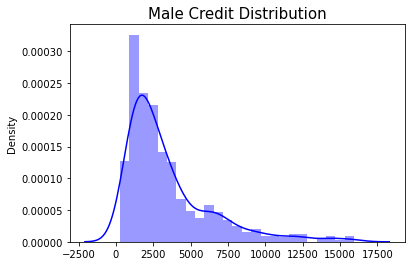

In [13]:
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
sns.distplot(male_credit, color="blue")
plt.title("Male Credit Distribution", fontsize=15)

C:\Users\84941\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female Credit Distribution')

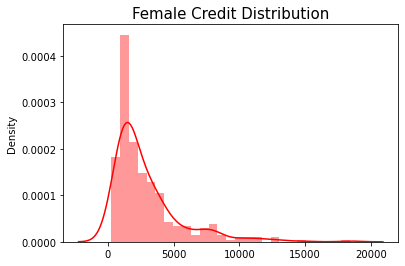

In [14]:
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values
sns.distplot(female_credit, color="red")
plt.title("Female Credit Distribution", fontsize=15)

C:\Users\84941\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Credit Distribution')

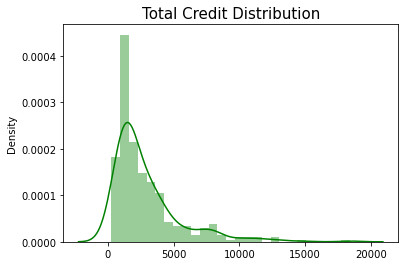

In [15]:
total_credit = df['Credit amount'].values
sns.distplot(female_credit, color="green")
plt.title("Total Credit Distribution", fontsize=15)

The Above plots shows the distribution of Credit_Amount for each Gender and overall

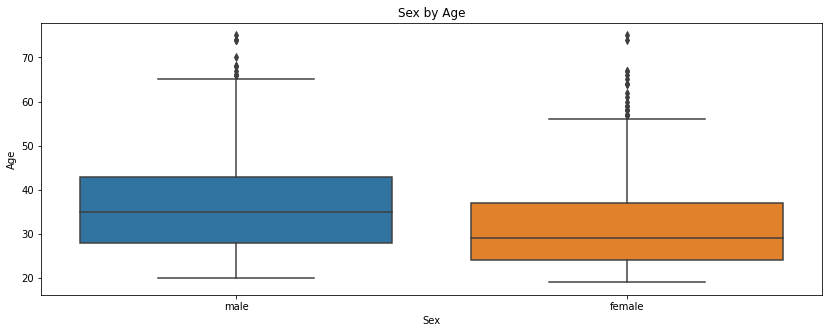

In [16]:
plt.figure(figsize=(14,5))
gx = sns.boxplot(x = 'Sex', y = 'Age', data = df)
gx.set_title("Sex by Age")
gx.set_ylabel("Age")
gx.set_xlabel("Sex")
plt.show()

Text(0.5, 1.0, 'The purpose of Loan')

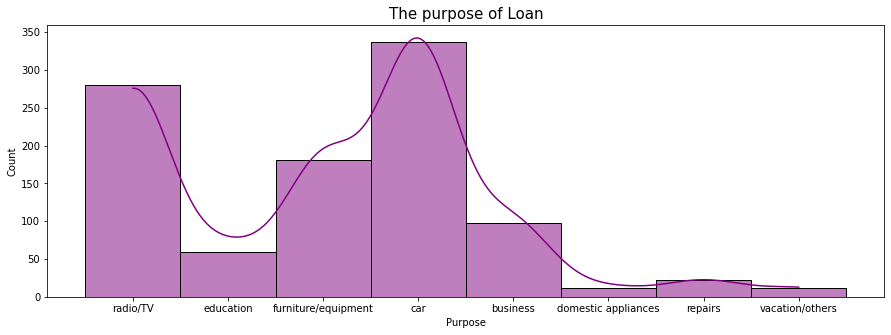

In [17]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = "Purpose", kde = True, color = "purple")
plt.title("The purpose of Loan", fontsize = 15)

<AxesSubplot:xlabel='Housing', ylabel='Count'>

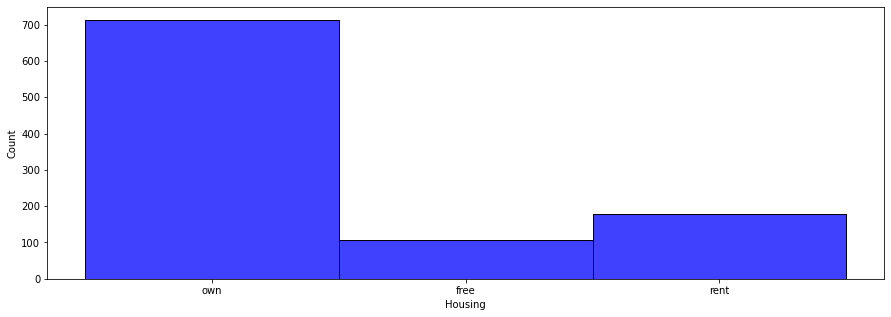

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = "Housing", color = "b")


Text(0.5, 1.0, 'Male Age')

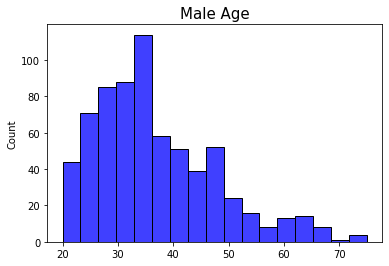

In [19]:
male_age = df["Age"].loc[df["Sex"] == "male"].values
sns.histplot(male_age, color = "blue")
plt.title("Male Age", fontsize=15)

Text(0.5, 1.0, 'Female Age')

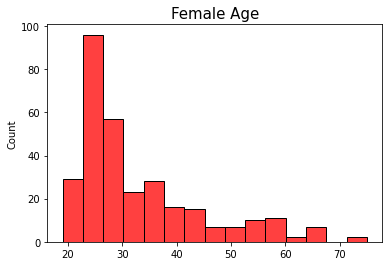

In [20]:
female_age = df["Age"].loc[df["Sex"] == "female"].values
sns.histplot(female_age, color = "red")
plt.title("Female Age", fontsize=15)

Text(0.5, 1.0, 'All Age ')

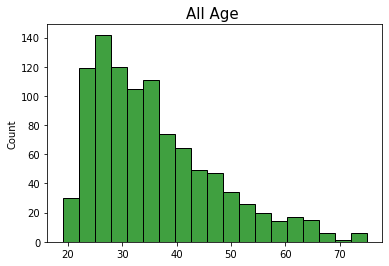

In [21]:
All_age = df['Age'].values
sns.histplot(All_age, color = "green")
plt.title("All Age ", fontsize=15)

In [45]:
#dividing Age groups into different categories
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,0,67,male,2,own,little,little,1169,6,radio/TV,0,Elder
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,Young
2,2,49,male,1,own,little,little,2096,12,education,0,Senior
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,Senior
4,4,53,male,2,free,little,little,4870,24,car,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment,0,Young Adults
996,996,40,male,3,own,little,little,3857,30,car,0,Young Adults
997,997,38,male,2,own,little,little,804,12,radio/TV,0,Young Adults
998,998,23,male,2,free,little,little,1845,45,radio/TV,1,Young


Text(0.5, 1.0, 'Age Group ')

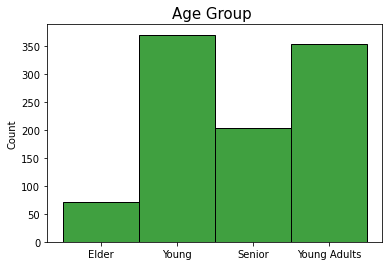

In [47]:
age_group = df['Age_Group'].values
sns.histplot(age_group, color = "green")
plt.title("Age Group ", fontsize=15)

Finding correlated variables and variables affecting the target variable the most.

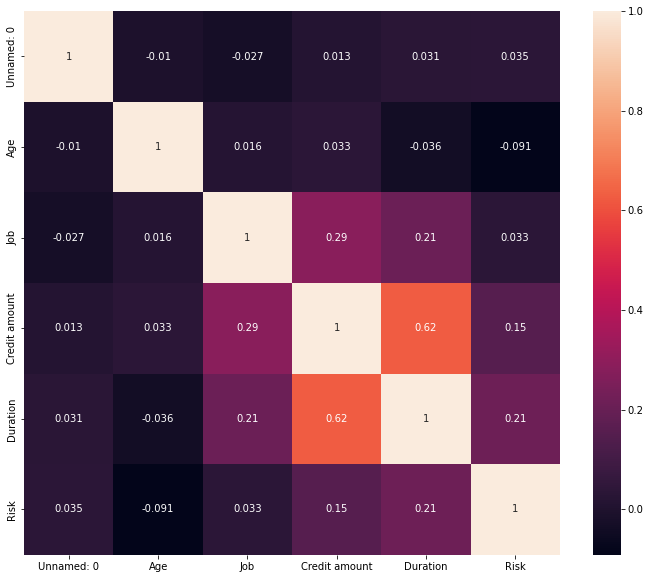

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [24]:
df_transformed = df.copy()

cat_fea = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
num_fea = ['Age', 'Job', 'Credit amount', 'Duration']

df_transformed = pd.get_dummies(df_transformed, columns = cat_fea, drop_first='True')

In [25]:
X = df_transformed.drop(columns = ['Risk'], axis = 1)
y = df_transformed['Risk']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 99)

LOGISTIC REGRESSION

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

prob_predictions1 = [item[1] for item in lr.predict_proba(X_validation)]
predictions1 = lr.predict(X_validation)
print("Area under curve : ", roc_auc_score(y_validation, prob_predictions1))

print("\n Classification report : \n", classification_report(y_validation, predictions1))
print("\n Accuracy Score: ", accuracy_score(y_validation, predictions1))

Area under curve :  0.6614858906525573

 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       216
           1       0.56      0.21      0.31        84

    accuracy                           0.73       300
   macro avg       0.66      0.57      0.57       300
weighted avg       0.70      0.73      0.69       300


 Accuracy Score:  0.7333333333333333


C:\Users\84941\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RANDOMFOREST 

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

prob_predictions2 = [item[1] for item in rf.predict_proba(X_validation)]
predictions2 = rf.predict(X_validation)
print("Area under curve : ", roc_auc_score(y_validation, prob_predictions2))

print("\n Classification report : \n", classification_report(y_validation, predictions2))

print("\n Accuracy Score: ", accuracy_score(y_validation, predictions2))

Area under curve :  0.681575176366843

 Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       216
           1       0.39      0.18      0.25        84

    accuracy                           0.69       300
   macro avg       0.57      0.54      0.53       300
weighted avg       0.64      0.69      0.65       300


 Accuracy Score:  0.6933333333333334


GAUSSIAN NB 



In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

prob_predictions3 = [item[1] for item in gnb.predict_proba(X_validation)]
predictions3 = gnb.predict(X_validation)
print("Area under curve : ", roc_auc_score(y_validation, prob_predictions3))

print("\n Classification report : \n", classification_report(y_validation, predictions3))

print("\n Accuracy Score: ", accuracy_score(y_validation, predictions3))

Area under curve :  0.6448963844797178

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       216
           1       0.40      0.43      0.42        84

    accuracy                           0.66       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.67      0.66      0.67       300


 Accuracy Score:  0.6633333333333333


KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

prob_predictions4 = [item[1] for item in knn.predict_proba(X_validation)]
predictions4 = knn.predict(X_validation)
print("Area under curve : ", roc_auc_score(y_validation, prob_predictions4))

print("\n Classification report : \n", classification_report(y_validation, predictions4))

print("\n Accuracy Score: ", accuracy_score(y_validation, predictions4))

Area under curve :  0.507964065255732

 Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.97      0.84       216
           1       0.62      0.12      0.20        84

    accuracy                           0.73       300
   macro avg       0.68      0.55      0.52       300
weighted avg       0.71      0.73      0.66       300


 Accuracy Score:  0.7333333333333333


ROC analysis

                                     FPR                              TPR  \
MODELS                                                                      
LR       [0.0, 0.06481481481481481, 1.0]  [0.0, 0.21428571428571427, 1.0]   
RF       [0.0, 0.10648148148148148, 1.0]  [0.0, 0.17857142857142858, 1.0]   
GNB      [0.0, 0.24537037037037038, 1.0]  [0.0, 0.42857142857142855, 1.0]   
KNN     [0.0, 0.027777777777777776, 1.0]  [0.0, 0.11904761904761904, 1.0]   

             AUC  
MODELS            
LR      0.574735  
RF      0.536045  
GNB     0.591601  
KNN     0.545635  


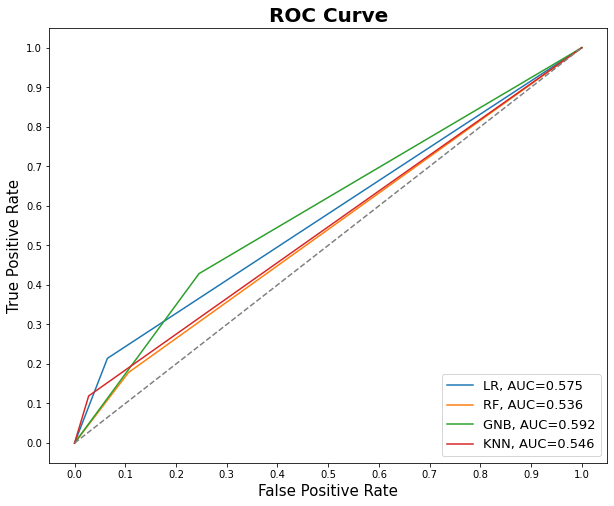

In [42]:
results = pd.DataFrame(columns = ['MODELS', 'FPR','TPR','AUC'])

predictions = {'LR': predictions1, 'RF':predictions2, 'GNB': predictions3, 'KNN': predictions4}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_validation, predictions[key])
    auc = roc_auc_score(y_validation, predictions[key])
    
    results = results.append({'MODELS': key,
                            'FPR' : fpr,
                            'TPR' : tpr,
                            'AUC' : auc}, ignore_index=True)
    
results.set_index('MODELS', inplace=True)

print(results)

fig = plt.figure(figsize = (10, 8))

for i in results.index:
    plt.plot(results.loc[i]['FPR'], 
             results.loc[i]['TPR'], 
             label = "{}, AUC={:.3f}".format(i, results.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color = 'grey', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step = 0.1))
plt.xlabel("False Positive Rate", fontsize = 15)

plt.yticks(np.arange(0.0, 1.1, step = 0.1))
plt.ylabel("True Positive Rate", fontsize = 15)

plt.title('ROC Curve', fontweight = 'bold', fontsize = 20)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()